In [1]:
import sys
import os
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass

In [2]:
current_dir = Path(os.getcwd())
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))

from src.main import main

In [3]:
@dataclass
class EnvironmentFeatures:
    grid_size: int = 20
    num_agents: int = 50
    num_foods: int = 100
    eating_threshold: float = 1
    
@dataclass
class AgentFeatures:  # note that we should expand this 
    speed: float = 1
    energy: float = np.inf
    size: int = None 

## Experiment X

In [19]:
env_features = EnvironmentFeatures(
    grid_size = 10,
    num_agents = 50,
    num_foods = 100,
    eating_threshold = 1,
)

agent_features = AgentFeatures(
    speed = 1,  # agent will take a step of lenght 1 on the grid of size 10 
    energy = np.inf,  # not using energy constraint
    size = None,  # not implemented yet but we'll have to 
)

n_days = 100

In [22]:
agents_per_day = main(env_features, agent_features, n_days, verbose=False)

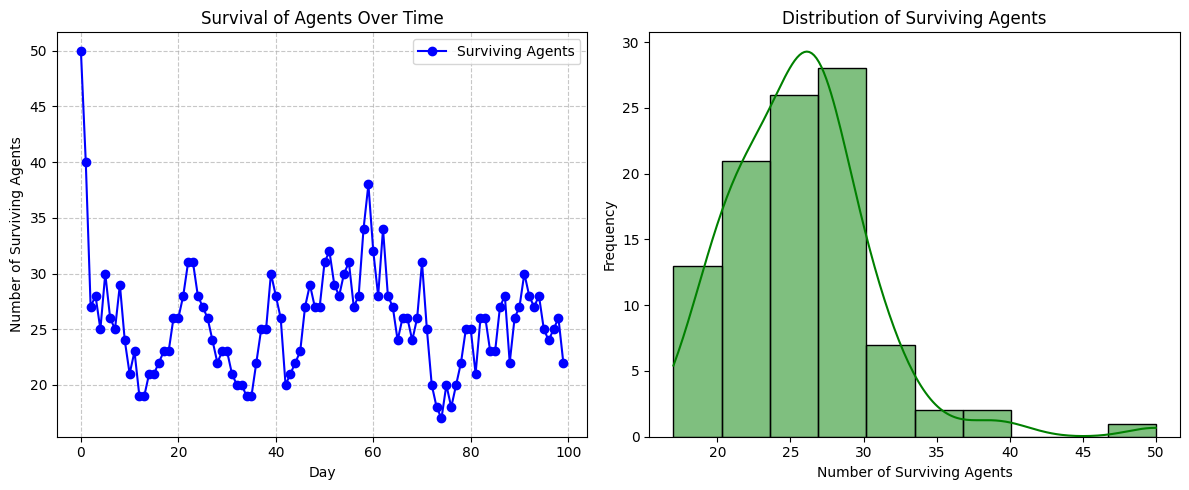

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(agents_per_day, marker='o', linestyle='-', color='b', label='Surviving Agents')
ax1.set_xlabel('Day')
ax1.set_ylabel('Number of Surviving Agents')
ax1.set_title('Survival of Agents Over Time')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

sns.histplot(agents_per_day, ax=ax2, bins=10, color='g', kde=True)
ax2.set_xlabel('Number of Surviving Agents')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Surviving Agents')

plt.tight_layout()
plt.show()